#  Data Analysis and Preparation – ASHRAE Great Energy Predictor III

This notebook explores  the data from the **ASHRAE Great Energy Predictor III** challenge,  
specifically focusing on **electricity consumption (meter = 0)**.

We will:

- Load and inspect datasets  
- Merge building, weather, and meter data  
- Explore distributions  
- Identify correlations  
- Visualize features  



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#  Loading Raw Data

We load the main CSV files:
- `train.csv`
- `building_metadata.csv`
- `weather_train.csv`




In [2]:
data = pd.read_csv('train.csv')

In [3]:
data

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


In [4]:
building = pd.read_csv('building_metadata.csv')

In [5]:
building

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [6]:
weather = pd.read_csv('weather_train.csv')

In [7]:
weather_clean = weather.drop_duplicates(subset=["site_id", "timestamp"])


#  Merging Datasets (train + building + weather)

We merge:
1. `train` with `building_metadata`  
2. The result with `weather_train`

This produces the unified dataset `df2`.


In [8]:
df1 = data.merge(building, on="building_id", how="left")
df2 = df1.merge(weather, on=["site_id", "timestamp"], how="left")


In [9]:
df2.head(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
5,5,0,2016-01-01 00:00:00,0.0,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
6,6,0,2016-01-01 00:00:00,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
7,7,0,2016-01-01 00:00:00,0.0,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
8,8,0,2016-01-01 00:00:00,0.0,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
9,9,0,2016-01-01 00:00:00,0.0,0,Office,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


# Checking Missing Values and Duplicates

We analyze:
- Missing values per column  
- Duplicated rows  
- Dataset consistency issues

This helps identify areas that require cleaning.


In [10]:
df2.isna().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [12]:
df2.duplicated(subset=["building_id", "meter", "timestamp"]).sum()


np.int64(0)

# Exploratory Data Analysis (EDA): Global Distributions

We display histograms for a random sample (n=500) to observe:
- Skewed distributions  
- Outliers  
- Global tendencies in the variables


array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'meter'}>,
        <Axes: title={'center': 'meter_reading'}>,
        <Axes: title={'center': 'site_id'}>],
       [<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'floor_count'}>,
        <Axes: title={'center': 'air_temperature'}>],
       [<Axes: title={'center': 'cloud_coverage'}>,
        <Axes: title={'center': 'dew_temperature'}>,
        <Axes: title={'center': 'precip_depth_1_hr'}>,
        <Axes: title={'center': 'sea_level_pressure'}>],
       [<Axes: title={'center': 'wind_direction'}>,
        <Axes: title={'center': 'wind_speed'}>, <Axes: >, <Axes: >]],
      dtype=object)

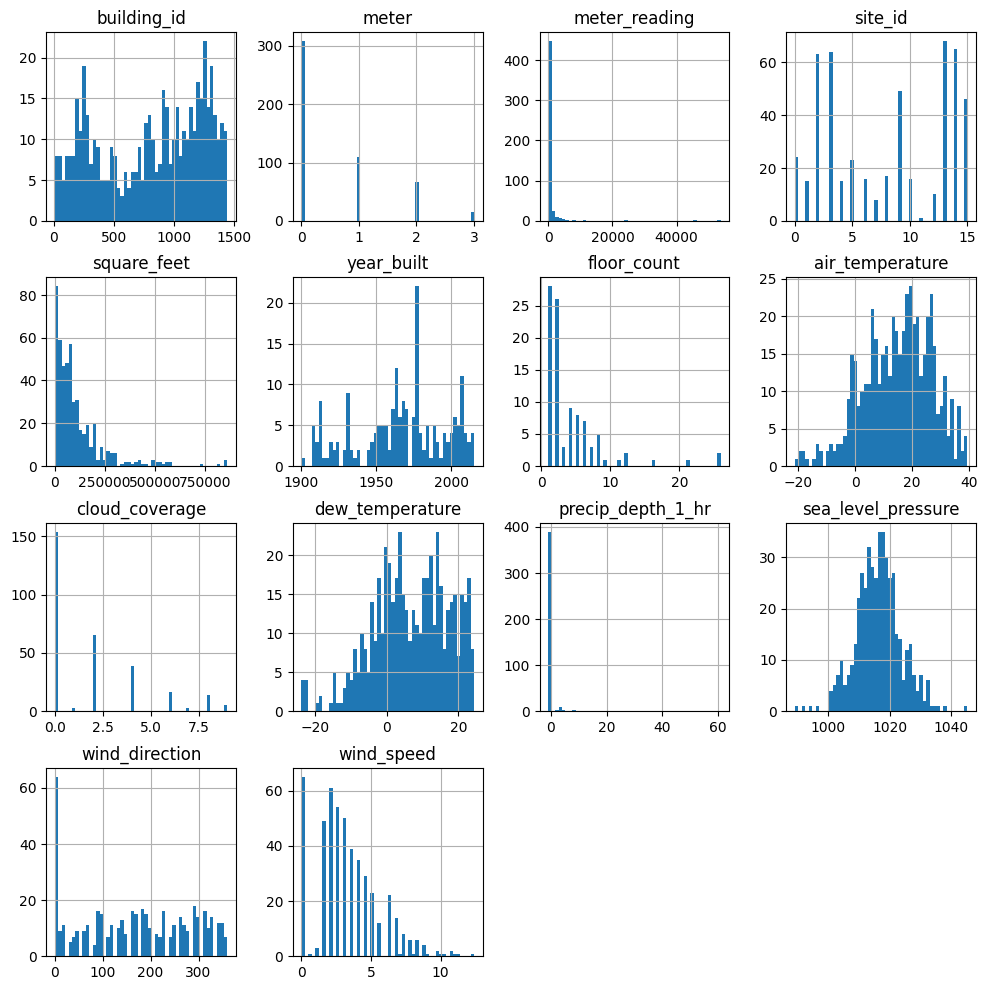

In [13]:
df2.sample(500).hist(bins=50,figsize=(12,12))

#  Filtering for Electricity Meter Only (meter = 0)

We select only the rows where `meter = 0`,
since this project focuses solely on **electricity prediction**.


In [16]:
data = df2[df2['meter']==0]

In [17]:
elect = data.drop(['meter'],axis=1)

# Visualizing Distributions After Filtering

Histograms of the filtered dataset (`elect`) to better understand
electricity consumption characteristics.


array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'meter_reading'}>,
        <Axes: title={'center': 'site_id'}>,
        <Axes: title={'center': 'square_feet'}>],
       [<Axes: title={'center': 'year_built'}>,
        <Axes: title={'center': 'floor_count'}>,
        <Axes: title={'center': 'air_temperature'}>,
        <Axes: title={'center': 'cloud_coverage'}>],
       [<Axes: title={'center': 'dew_temperature'}>,
        <Axes: title={'center': 'precip_depth_1_hr'}>,
        <Axes: title={'center': 'sea_level_pressure'}>,
        <Axes: title={'center': 'wind_direction'}>],
       [<Axes: title={'center': 'wind_speed'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

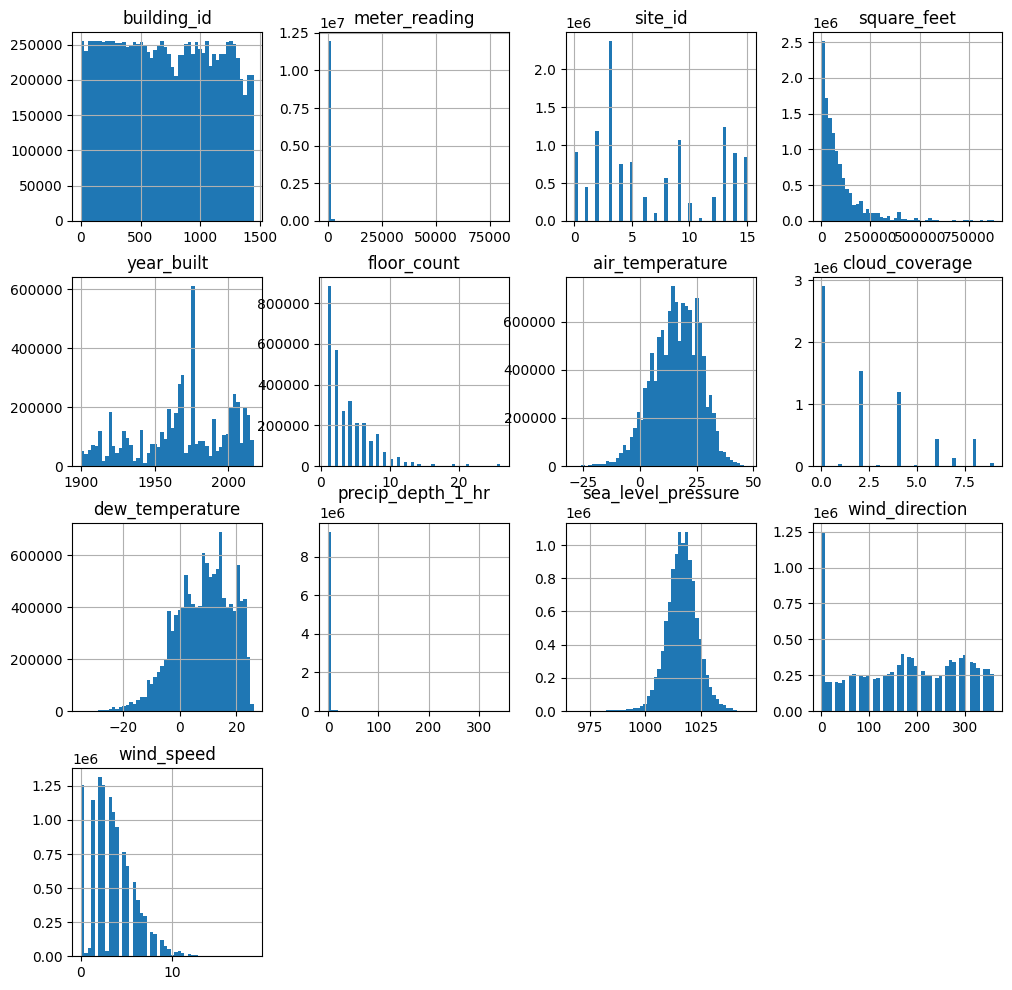

In [18]:
elect.hist(bins=50,figsize=(12,12))

In [19]:
from pandas.plotting import scatter_matrix

# Multivariate Analysis: Scatter Matrix

We plot relationships between key variables such as:
- Square feet
- Meter reading
- Year built
- Air temperature
- Dew temperature
- Sea level pressure

Useful to detect non-linear patterns.


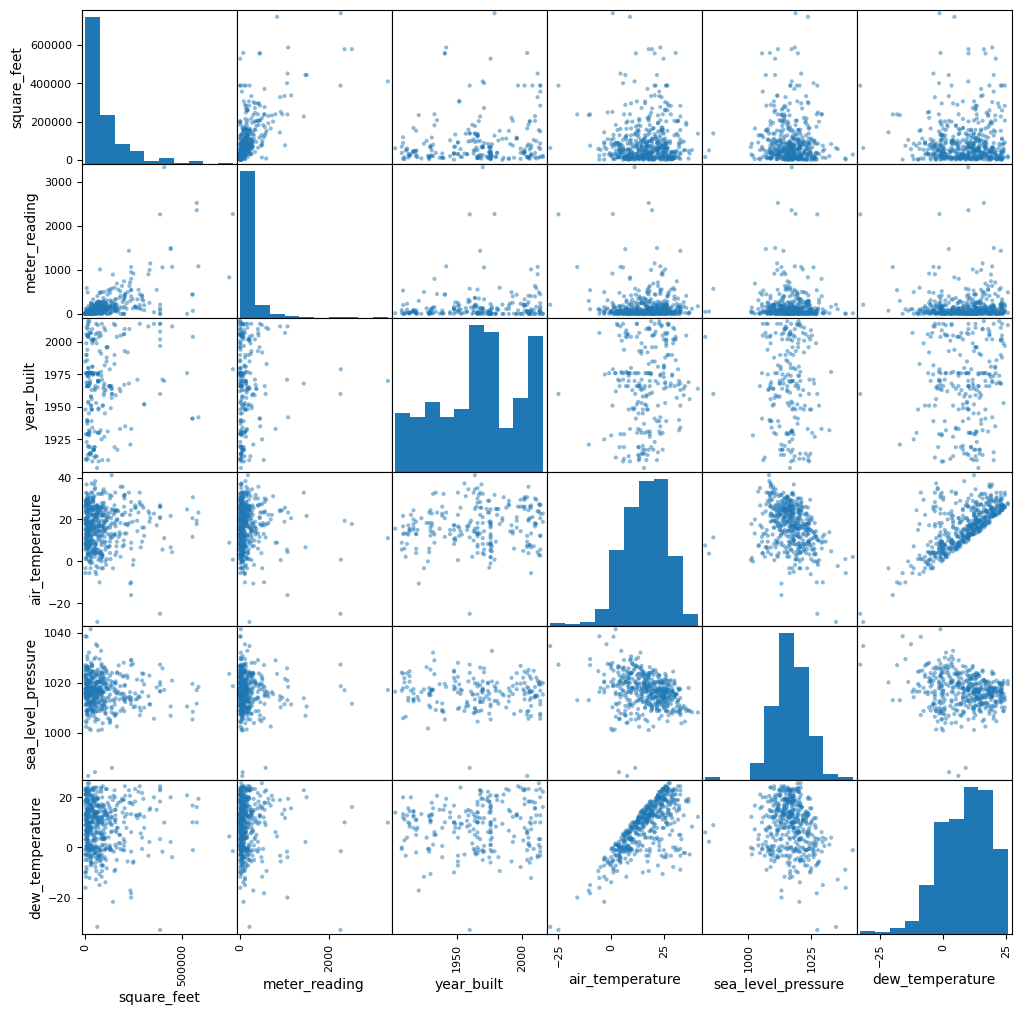

In [20]:
columns = ['square_feet','meter_reading','year_built','air_temperature','sea_level_pressure','dew_temperature']
scatter_matrix(elect[columns].sample(500),figsize=(12,12))
plt.show()

In [24]:
from sklearn.compose import make_column_selector

In [25]:
select=make_column_selector(dtype_include=np.number)
columns = select(elect)
elect[columns]

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
10984632,791,1200.9600,7,150695,NaN,5.0,12.9,NaN,10.4,NaN,1021.2,230.0,0.5
7652548,627,101.7500,4,56637,1953.0,5.0,16.7,4.0,6.7,0.0,1017.8,250.0,5.1
17342078,358,81.1500,3,77700,NaN,NaN,10.0,2.0,2.2,0.0,1020.6,330.0,5.7
2606117,74,0.0000,0,387638,1997.0,NaN,20.6,2.0,7.8,0.0,1020.1,280.0,3.1
17822897,350,95.6600,3,83800,1944.0,NaN,10.6,0.0,7.8,0.0,1017.7,210.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674318,639,28.9939,4,14524,1964.0,2.0,16.1,NaN,12.8,0.0,1017.6,130.0,4.6
7138218,1401,107.2000,15,168791,1946.0,NaN,27.2,4.0,13.9,NaN,1013.9,170.0,5.1
16873771,214,169.1800,2,91273,1951.0,NaN,18.9,4.0,2.8,0.0,1011.6,220.0,2.6
10927758,324,41.2500,3,11910,NaN,NaN,22.8,NaN,21.1,0.0,1019.0,200.0,2.6


# Correlation Matrix (Heatmap)

We compute correlations between numerical variables
(excluding identifiers like building_id and site_id).

This helps identify the strongest predictors of electricity usage.


<Axes: >

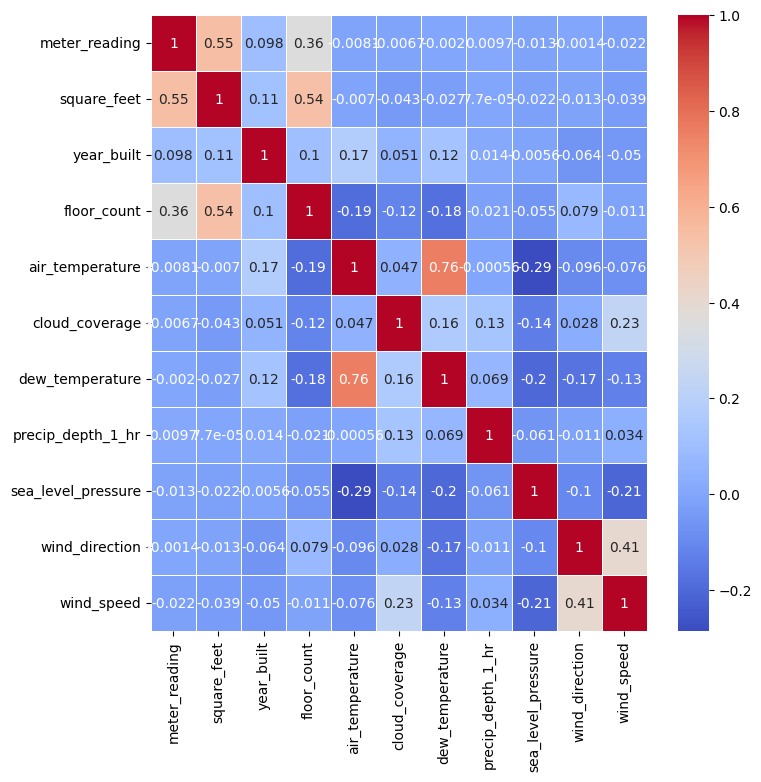

In [46]:
import seaborn as sns
plt.figure(figsize=(8, 8))
corr_elect = elect[pd.Index(columns).drop(['building_id','site_id'])].corr()
sns.heatmap(corr_elect , annot=True, cmap='coolwarm', linewidths=0.5)

In [32]:
corr_elect['meter_reading']

meter_reading         1.000000
square_feet           0.547831
year_built            0.098462
floor_count           0.360666
air_temperature      -0.008095
cloud_coverage       -0.006671
dew_temperature      -0.001992
precip_depth_1_hr     0.009651
sea_level_pressure   -0.013100
wind_direction       -0.001358
wind_speed           -0.021792
Name: meter_reading, dtype: float64

# Feature Engineering Exploration: Surface per Floor

We create a new feature:


In [33]:
surface_per_floor = elect['square_feet']/elect['floor_count']
elect['meter_reading'].corr(surface_per_floor)

np.float64(0.24028056166177836)

# Descriptive Statistics

We compute summary statistics:
- Mean
- Standard deviation
- Percentiles
- Min / Max

This provides a global numeric overview of the dataset.


In [35]:
pd.set_option('display.float_format', '{:.2f}'.format)
elect.describe()

,building_id,meter_reading,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,9648728.00,9648728.00,9648728.00,9648728.00,4473431.00,2370769.00,9611014.00,5385753.00,9609604.00,7638323.00,8834299.00,9105445.00,9595448.00
mean,706.66,170.80,6.75,92697.58,1968.33,3.80,16.01,2.28,8.33,0.80,1016.41,176.37,3.56
std,415.23,380.71,4.95,112092.90,31.02,3.37,10.40,2.55,9.84,7.73,7.04,112.88,2.32
min,0.00,0.00,0.00,283.00,1900.00,1.00,-28.90,0.00,-35.00,-1.00,968.20,0.00,0.00
25%,345.00,19.50,3.00,23012.00,1950.00,1.00,8.90,0.00,1.10,0.00,1012.10,80.00,2.10
50%,698.00,62.81,5.00,57811.00,1970.00,3.00,16.70,2.00,9.40,0.00,1016.50,180.00,3.10
75%,1063.00,170.06,12.00,116121.00,1996.00,5.00,23.90,4.00,16.10,0.00,1020.70,280.00,4.60
max,1448.00,79769.00,15.00,875000.00,2017.00,26.00,47.20,9.00,26.10,343.00,1045.50,360.00,19.00


In [36]:
mean_usage = elect.groupby('primary_use')['meter_reading'].mean().reset_index()

#  Average Consumption by Primary Use

We group by `primary_use` and visualize the mean electricity consumption
for each type of building using a bar plot.


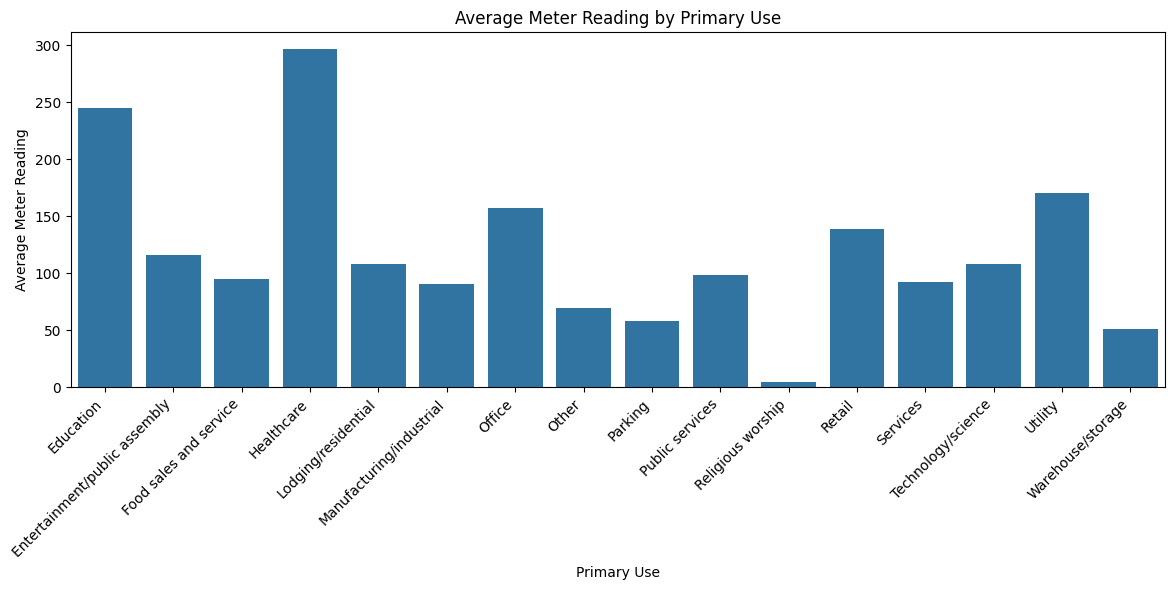

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_usage,x='primary_use',y='meter_reading'
)

plt.title('Average Meter Reading by Primary Use')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Primary Use')
plt.ylabel('Average Meter Reading')
plt.tight_layout()
plt.show()

#  Log Transformation of Skewed Features

We apply `log1p` to reduce skewness for distributions like:
- Meter reading
- Square feet

This is useful for improving model behavior and handling extreme values.


array([[<Axes: title={'center': 'Y'}>]], dtype=object)

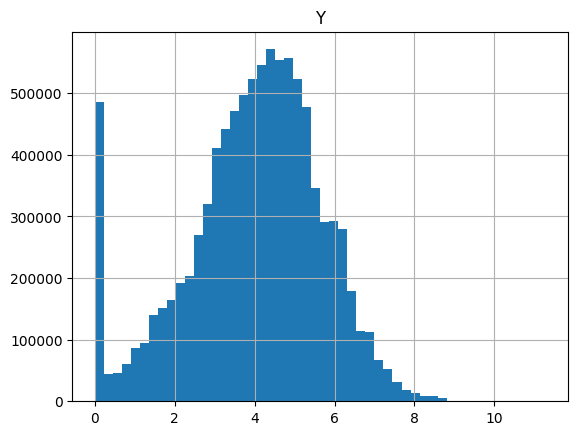

In [38]:
elect['meter_reading_adj'] = elect['meter_reading']
pd.DataFrame({'Y':np.log(elect['meter_reading']+1)}).hist(bins=50)

array([[<Axes: title={'center': 'x'}>]], dtype=object)

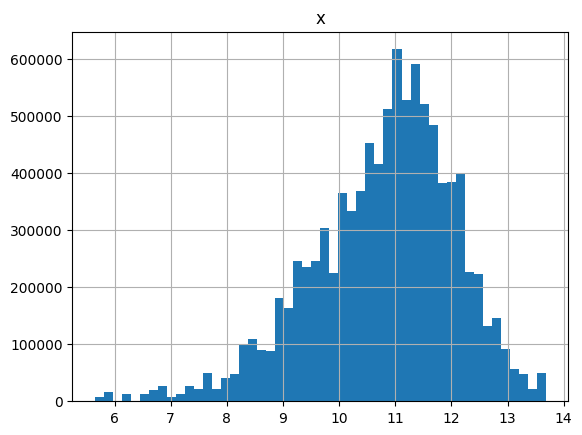

In [39]:
pd.DataFrame({'x':np.log1p(elect['square_feet'])}).hist(bins=50)